In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# **understand the data**

In [2]:
data=pd.read_csv('/kaggle/input/insurance/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
numerical_col=data.select_dtypes(include=np.number).columns.to_list()
categorical_col=data.select_dtypes(include='O').columns.to_list()
categorical_col

['sex', 'smoker', 'region']

# **Data visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

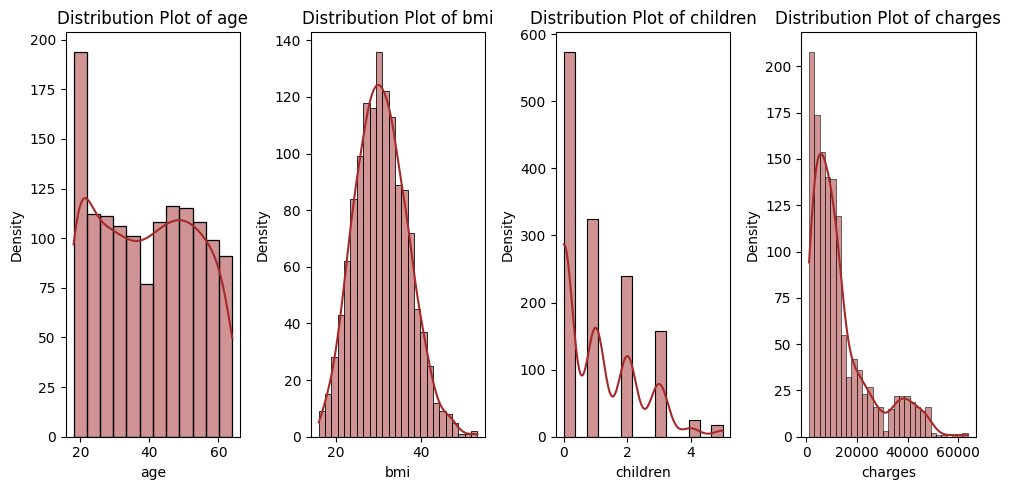

In [10]:
plt.figure(figsize=(10,5))
for i,col in enumerate(numerical_col):
    plt.subplot(1,4,i+1)
    sns.histplot(data[col],kde=True,color='brown')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {col}')
plt.show()

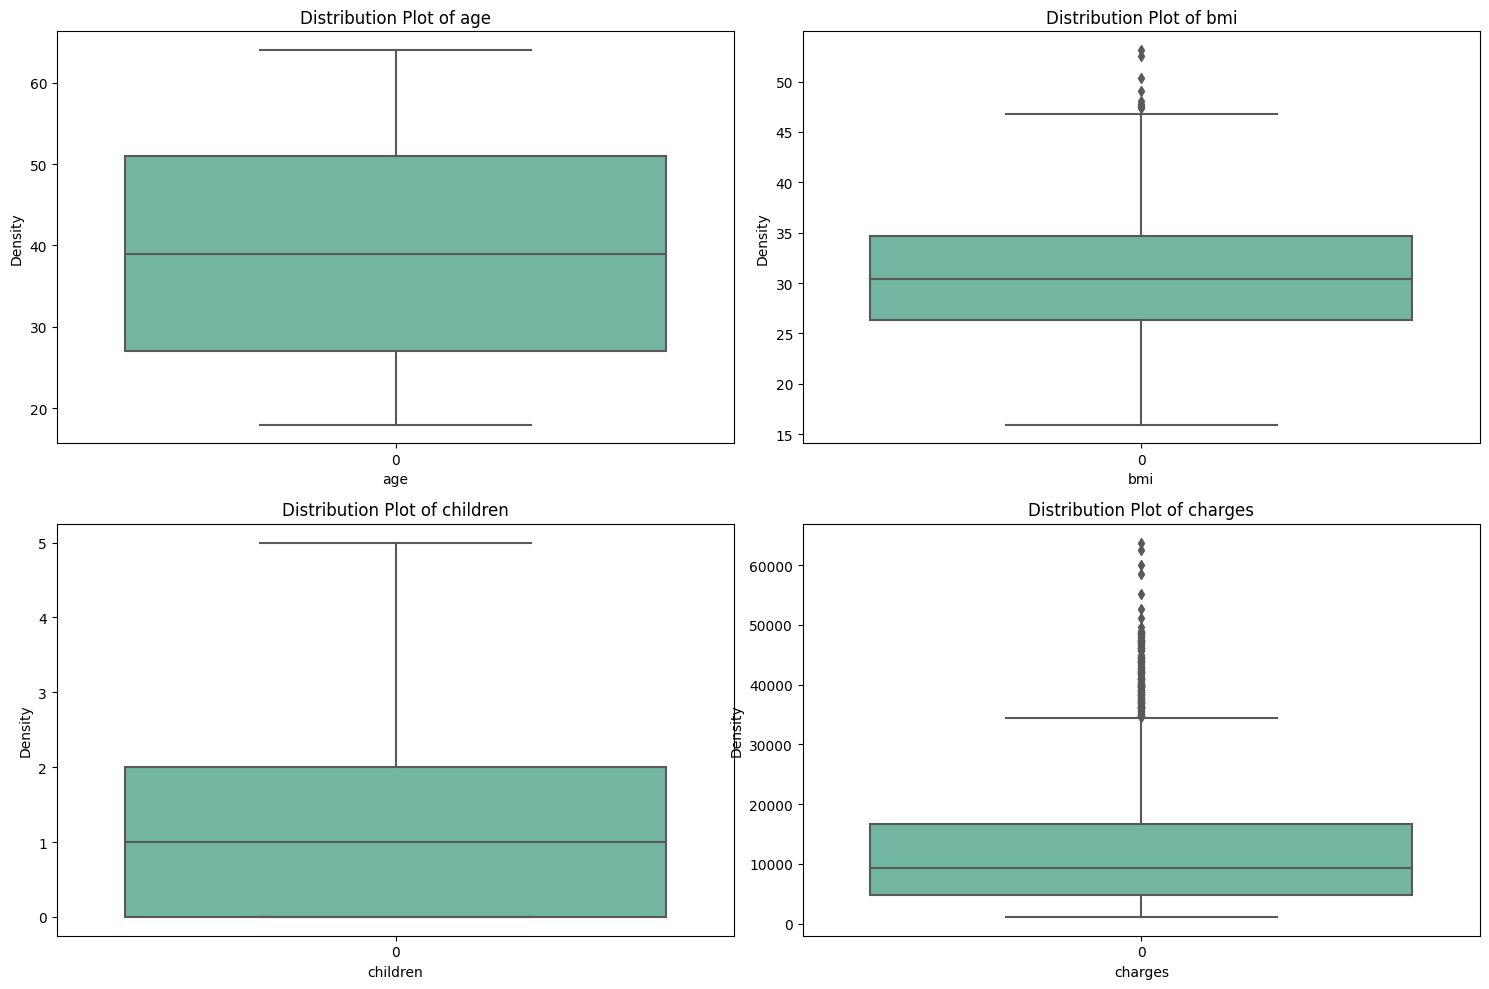

In [11]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_col):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col],palette='Set2')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {col}')
plt.show()
# sns.violinplot(x='target',y='age',data=data)

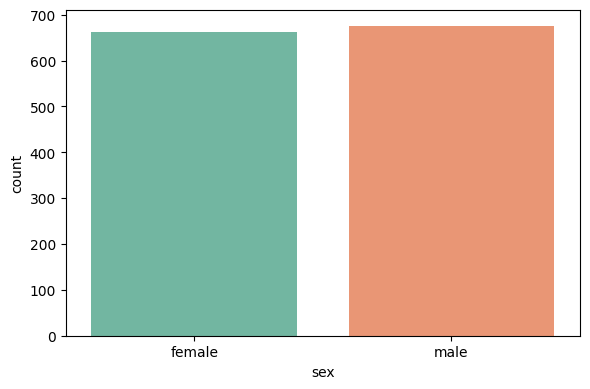

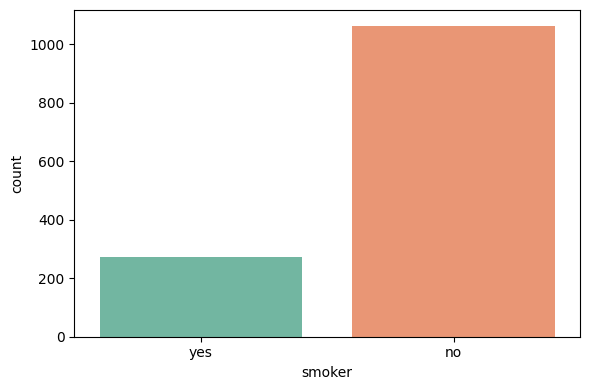

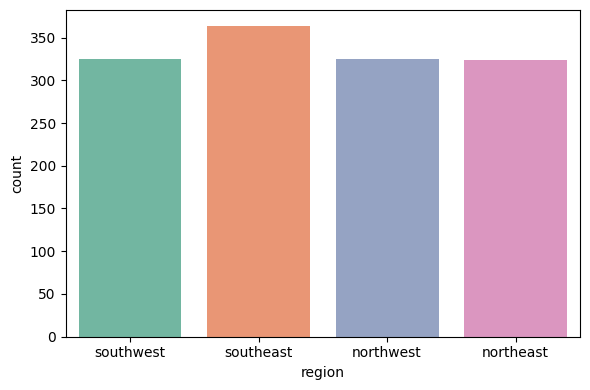

In [12]:
for i in categorical_col:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[i],palette='Set2')
    plt.tight_layout()
    plt.show()

relation between age and smoking

/tmp/ipykernel_17/2450443605.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['age'], hue=data['smoker'], shade=True, bw_adjust=.5)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple 

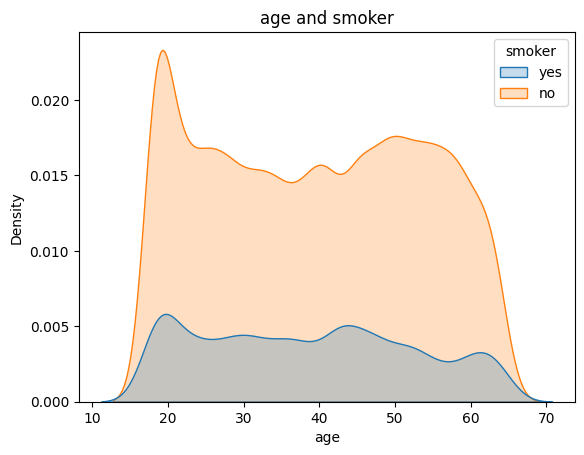

In [13]:
sns.kdeplot(x=data['age'], hue=data['smoker'], shade=True, bw_adjust=.5)
plt.title('age and smoker')
plt.show()


relation between bmi and smoking

/tmp/ipykernel_17/3514878627.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['bmi'], hue=data['smoker'], shade=True, bw_adjust=.5)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple 

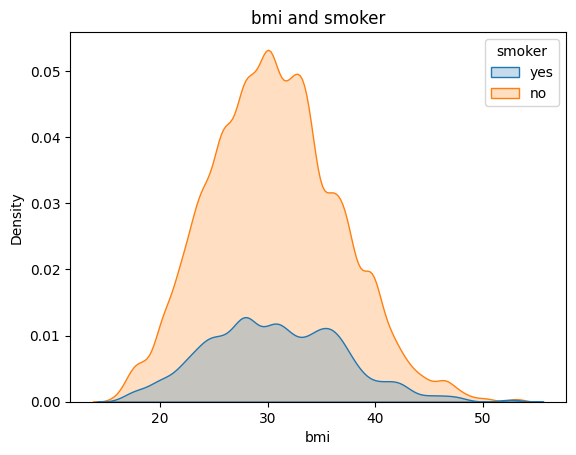

In [14]:
sns.kdeplot(x=data['bmi'], hue=data['smoker'], shade=True, bw_adjust=.5)
plt.title('bmi and smoker')
plt.show()


<Axes: xlabel='region', ylabel='count'>

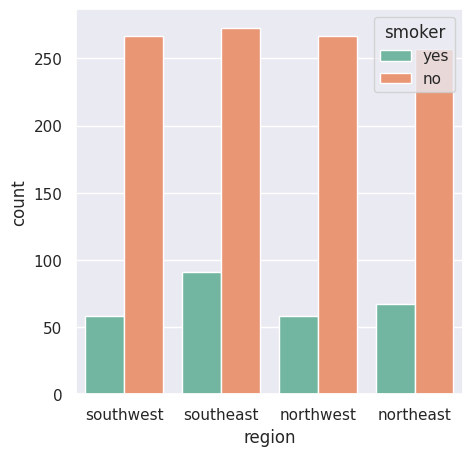

In [15]:
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
sns.countplot(x='region',hue='smoker',data=data,palette='Set2')

<Axes: xlabel='region', ylabel='count'>

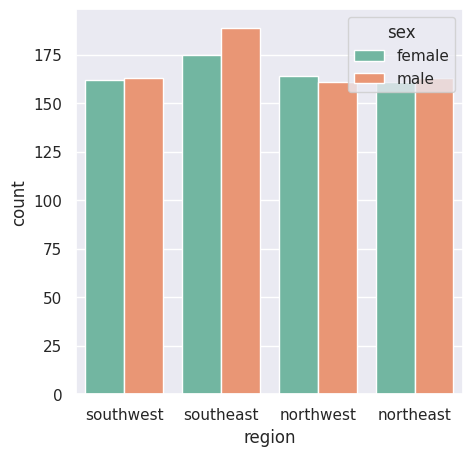

In [16]:
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
sns.countplot(x='region',hue='sex',data=data,palette='Set2')

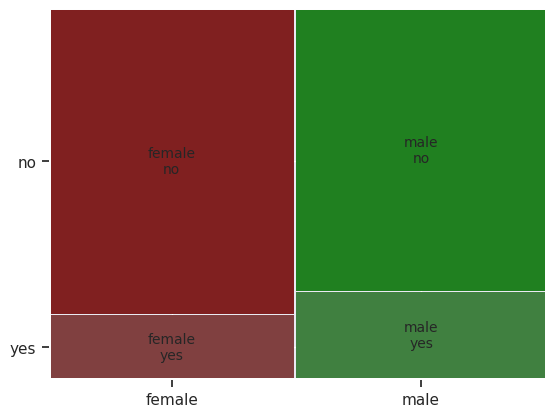

In [17]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['sex', 'smoker'])
plt.show()


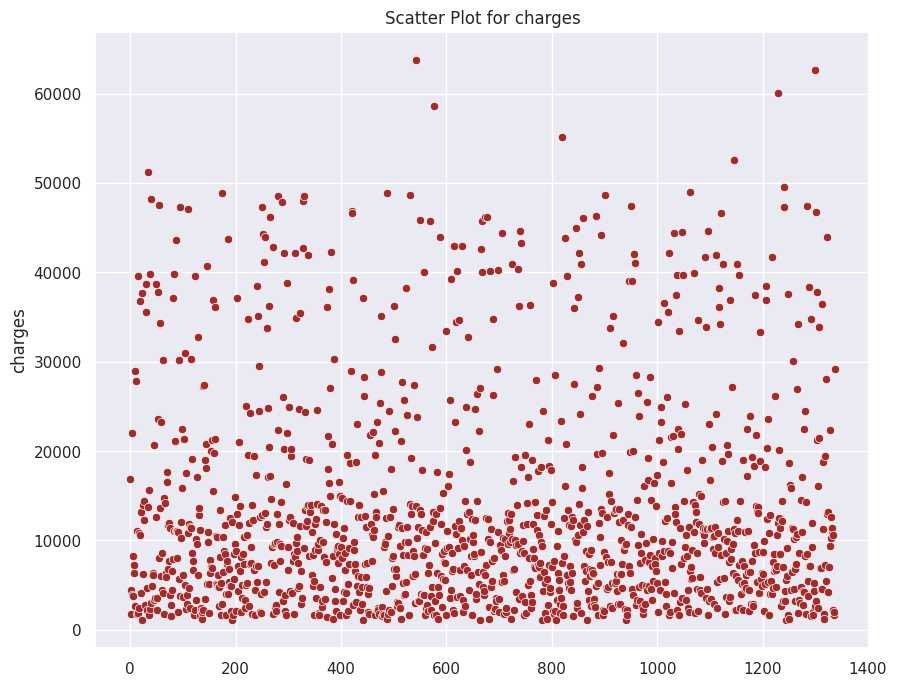

In [18]:
sns.scatterplot( data=data['charges'],color='brown')
plt.title('Scatter Plot for charges')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

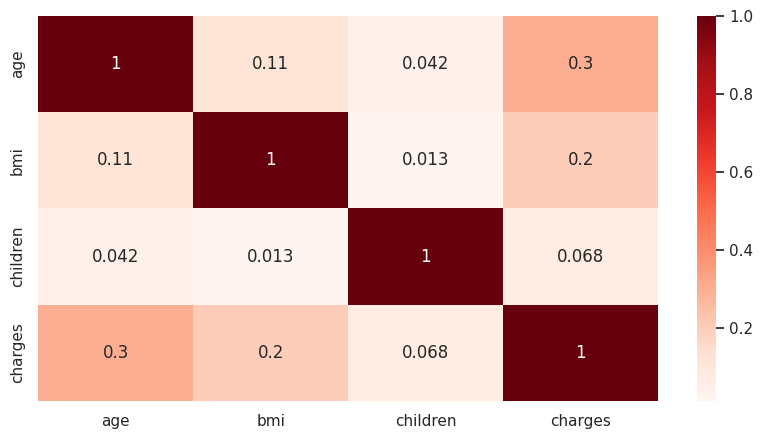

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(data[numerical_col].corr(),annot=True,cmap='Reds')
plt.show()

# **Feature engneering**

In [20]:
data['age'].min()

18

In [21]:
group_age=[]
for i in range(len(data)):
    if data['age'][i]<20:
        group_age.append(0)
    elif data['age'][i]<30:
        group_age.append(1)
    elif data['age'][i]<40:
        group_age.append(2)
    elif data['age'][i]<50:
        group_age.append(3)
    elif data['age'][i]<60:
        group_age.append(4)
    else:
        group_age.append(5)
data['group_age']=pd.DataFrame(group_age)

In [22]:
data

,age,sex,bmi,children,smoker,region,charges,group_age
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,4
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


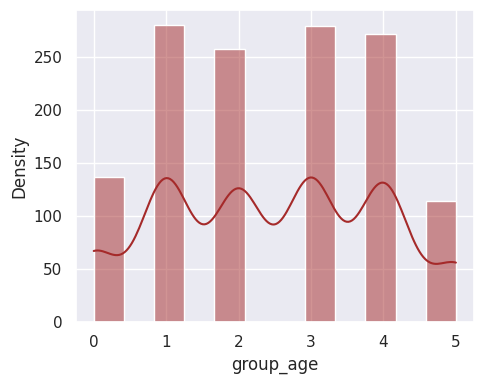

In [23]:
plt.figure(figsize=(5,4))
sns.histplot(data['group_age'],kde=True,color='brown')
plt.tight_layout()
plt.ylabel('Density')
plt.show()

# **data preprocessing**

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
from operator import le
le=LabelEncoder()
for col in categorical_col:
    data[col]=le.fit_transform(data[col])
data

,age,sex,bmi,children,smoker,region,charges,group_age
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,2
4,32,1,28.880,0,0,1,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,4
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,1


In [26]:
x=data.drop(columns=['charges'])
y=data.iloc[:,6:7]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [28]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [29]:
print(x_train.shape)
print(x_test.shape)

(1136, 7)
(201, 7)


# **Modeling**

# *linear regression*

In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_squared_error:  35623742.65431315
train_score:  0.7388968273253511
test_score:  0.7997361203215281


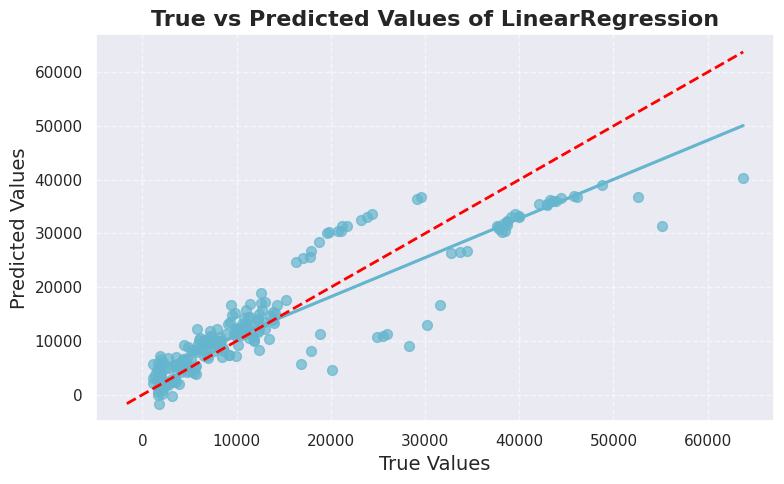

In [31]:
y_test = y_test.squeeze()
y_pred = y_pred.squeeze()

y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='c', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values of LinearRegression', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# *Random forest*

In [32]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

/tmp/ipykernel_17/3072502842.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


mean_squared_error:  22457377.15675003
train_score:  0.975995180581992
test_score:  0.873752695766543


In [33]:
# param_rf={
#     'n_estimators': [50, 100, 150, 250, 500],
#     'max_depth': [3, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 5, 10, 15],
#     'min_samples_split': [2, 5, 10, 15],
#     'max_features': ['auto', 'log2', 'sqrt'],
#     'bootstrap': [True, False],
#     'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],  # Only valid for regression
# }

In [34]:
rf=RandomForestRegressor(
    criterion='friedman_mse', max_depth=4,
   max_features='auto', min_samples_split=10,
                      n_estimators=500
)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

/tmp/ipykernel_17/965875476.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


mean_squared_error:  19116827.76990237
train_score:  0.8706520719881892
test_score:  0.8925320639805858


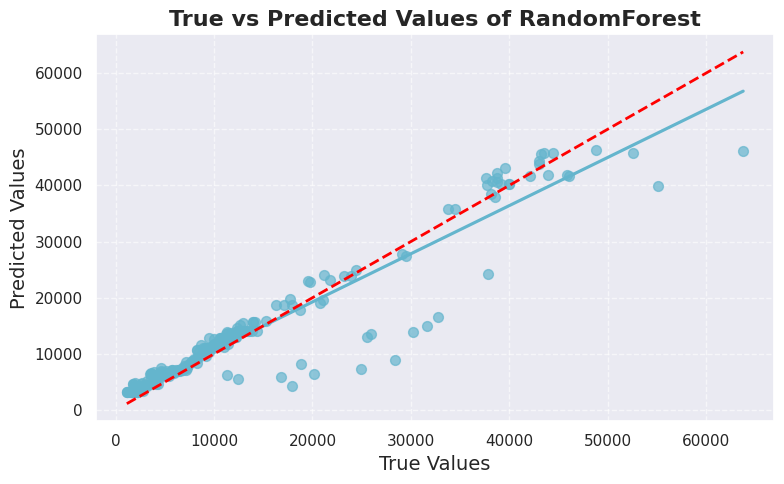

In [35]:
y_test = y_test.squeeze()
y_pred = y_pred.squeeze()

y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='c', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values of RandomForest', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# *XGB*

In [36]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",xgb.score(x_train,y_train))
print("test_score: ",xgb.score(x_test,y_test))

mean_squared_error:  27337841.58028412
train_score:  0.9953577109051128
test_score:  0.84631647859043


In [37]:
# param_xgb={
#     'max_depth': [3, 5, 7, 9, 11],  # Add more values if needed
#     'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
#     'n_estimators': [50,100, 500, 1000, 1500, 2000],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'min_child_weight': [1, 3, 5, 7, 10, 15],
#     'reg_alpha': [0.1, 0.3, 0.5, 1.0],
#     'reg_lambda': [0.5, 0.7, 0.9, 1.0, 1.2],
#     'colsample_bylevel': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'colsample_bynode': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
# }

In [38]:
xgb=XGBRegressor(
max_depth = 3, n_estimators=50, learning_rate =.2
)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",xgb.score(x_train,y_train))
print("test_score: ",xgb.score(x_test,y_test))

mean_squared_error:  18952983.469237115
train_score:  0.8899864450097508
test_score:  0.8934531377608687


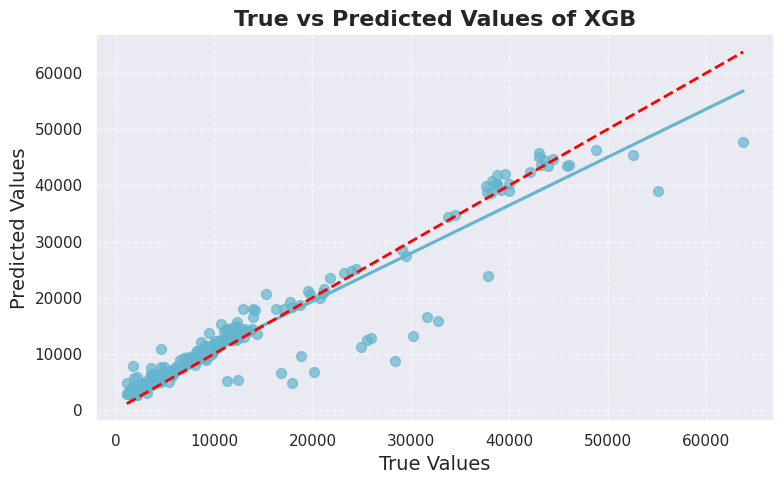

In [39]:
y_test = y_test.squeeze()
y_pred = y_pred.squeeze()

y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='c', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values of XGB', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# *Catboost*

In [40]:
!pip install catboost


In [41]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor(learning_rate =.01, max_depth =4, verbose = 0)
cat.fit(x_train,y_train)
y_pred=cat.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",cat.score(x_train,y_train))
print("test_score: ",cat.score(x_test,y_test))

mean_squared_error:  18714954.071244694
train_score:  0.8778162211889159
test_score:  0.894791253499635


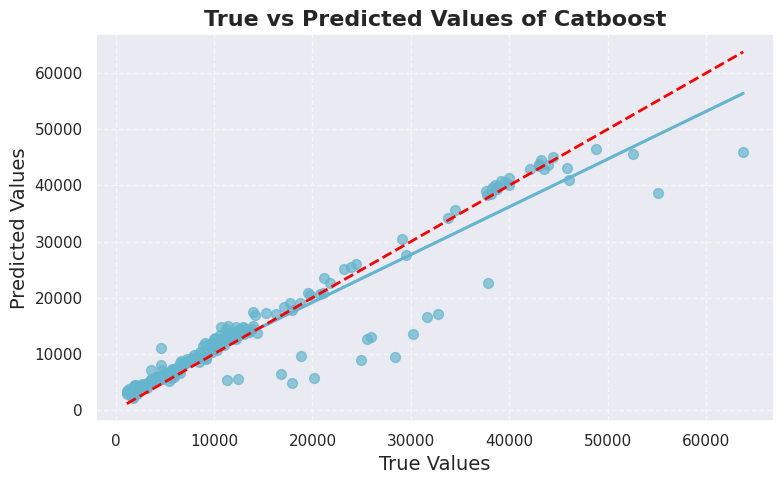

In [42]:
y_test = y_test.squeeze()
y_pred = y_pred.squeeze()

y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='c', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values of Catboost', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Models comparison**

In [43]:
acc=[]
names=['LinearRegression','RandomForest','XGB','Catboost']
acc.extend([lr.score(x_test,y_test),rf.score(x_test,y_test),xgb.score(x_test,y_test),cat.score(x_test,y_test)])
acc

[0.7997361203215281, 0.8925320639805858, 0.8934531377608687, 0.894791253499635]

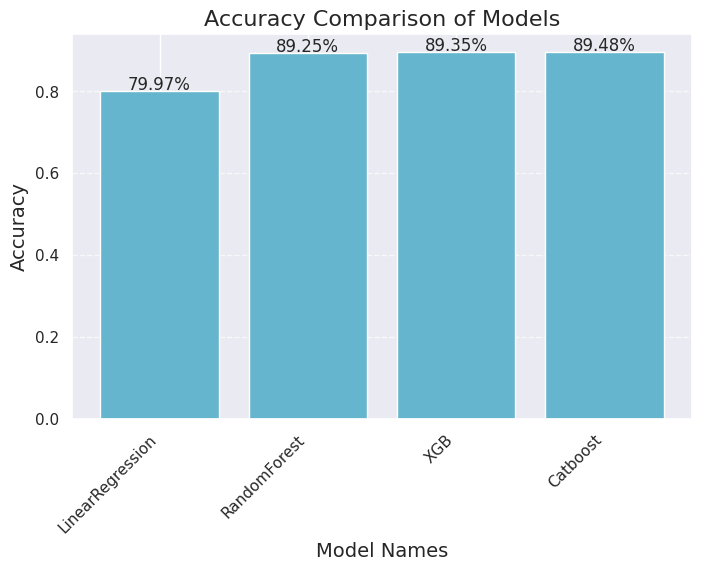

In [44]:
plt.figure(figsize=(8,5))

plt.bar(names, acc, color='c')
plt.title('Accuracy Comparison of Models', fontsize=16)
plt.xlabel('Model Names', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(acc):
    plt.text(i, value + 0.005 , f'{value*100:.2f}%', ha='center', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.show()